# Importing modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style="whitegrid", color_codes=True)

# Importing Data

In [2]:
google_data = pd.read_csv("googleplaystore.csv")

# Exploring Data

In [3]:
google_data.shape

(10841, 13)

In [4]:
# we look at the first five entries using the head() method
google_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
# checking the data types of the variables 
google_data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [6]:
google_data.Reviews = pd.to_numeric(google_data.Reviews, errors='coerce')
google_data.Price = pd.to_numeric(google_data.Price, errors='coerce')
google_data.Rating = pd.to_numeric(google_data.Rating, errors='coerce')
google_data.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size               object
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [7]:
google_data.get_dtype_counts()

float64     3
object     10
dtype: int64

In [8]:
numerical_variables = ['Rating']
google_data[numerical_variables].describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [9]:
google_data.Rating.value_counts()

4.4     1109
4.3     1076
4.5     1038
4.2      952
4.6      823
4.1      708
4.0      568
4.7      499
3.9      386
3.8      303
5.0      274
3.7      239
4.8      234
3.6      174
3.5      163
3.4      128
3.3      102
4.9       87
3.0       83
3.1       69
3.2       64
2.9       45
2.8       42
2.6       25
2.7       25
2.5       21
2.3       20
2.4       19
1.0       16
2.2       14
1.9       13
2.0       12
2.1        8
1.7        8
1.8        8
1.6        4
1.4        3
1.5        3
1.2        1
19.0       1
Name: Rating, dtype: int64

we found an error in rating one of the apps. It was rated 19.0 while rating ranges between 1 and 5.

In [10]:
# we look into the error value
google_data[google_data.Rating == 19.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,NaN,"1,000+",Free,0,NaN,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [11]:
# we drop the row and clean the data
google_data = google_data.drop(google_data.index[10472])

In [12]:
google_data.loc[10471:10475, :]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042.0,404k,"100,000+",Free,0.0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203.0,4.1M,"10,000,000+",Free,0.0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37.0,14M,"1,000+",Free,0.0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132.0,2.6M,"50,000+",Free,0.0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


In [13]:
google_data = google_data.dropna()

We take a closer look at categories:

In [14]:
# number of categories
google_data.Category.nunique()

33

In [15]:
# name list of categories
google_data.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [16]:
google_data[['Category', 'Rating', 'Type']]

,Category,Rating,Type
0,ART_AND_DESIGN,4.1,Free
1,ART_AND_DESIGN,3.9,Free
2,ART_AND_DESIGN,4.7,Free
3,ART_AND_DESIGN,4.5,Free
4,ART_AND_DESIGN,4.3,Free
5,ART_AND_DESIGN,4.4,Free
6,ART_AND_DESIGN,3.8,Free
7,ART_AND_DESIGN,4.1,Free
8,ART_AND_DESIGN,4.4,Free
9,ART_AND_DESIGN,4.7,Free


In [17]:
google_count=google_data.Category.value_counts().reset_index().rename(columns={'index': 'Category', 0: 'count'})

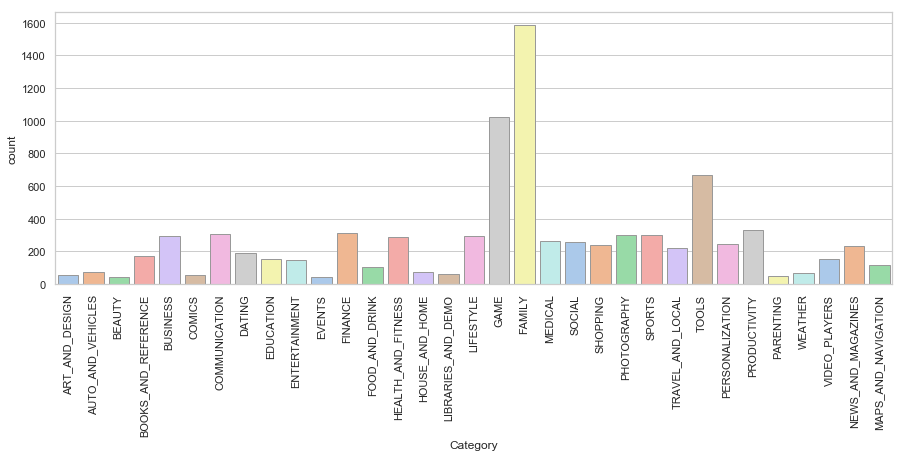

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
fig = sns.countplot(x=google_data['Category'], palette="pastel",edgecolor=".6")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

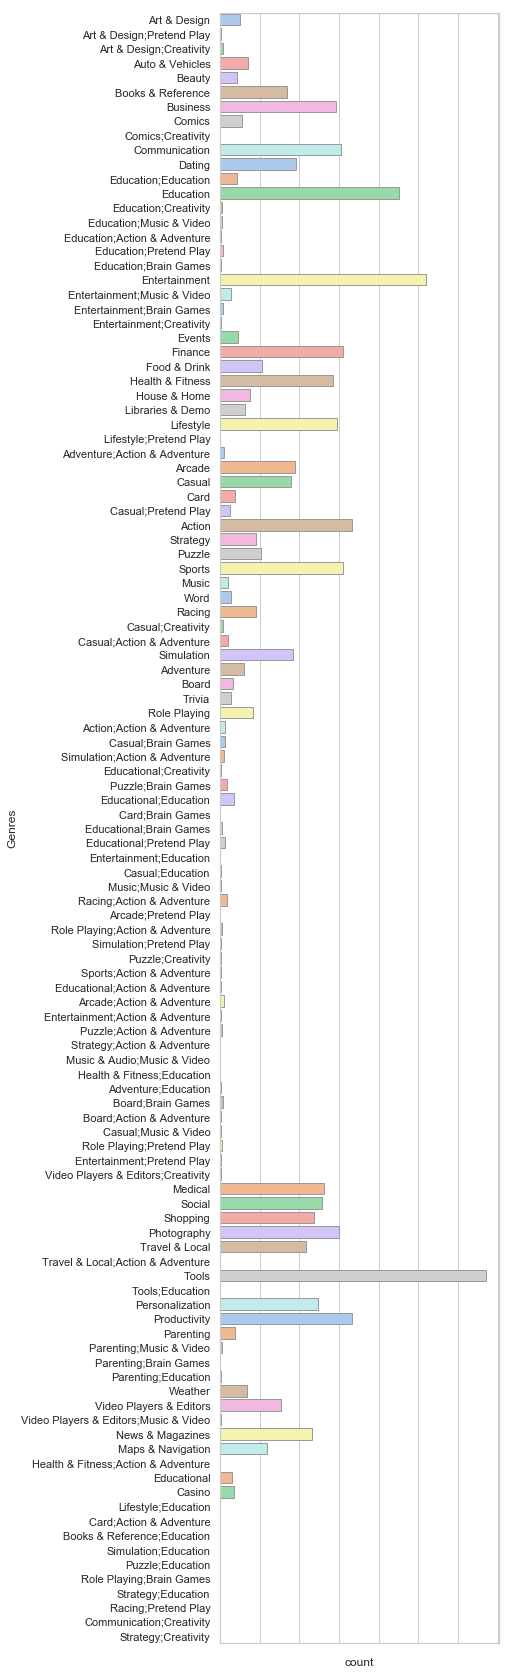

In [19]:
plt.figure(figsize=(5,30))
fig = sns.countplot(y=google_data['Genres'], palette="pastel",edgecolor=".6")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

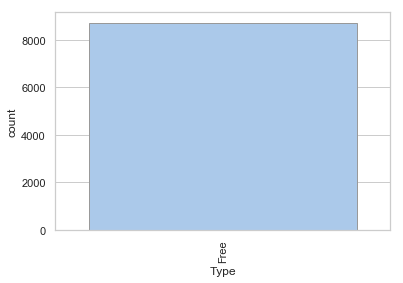

In [20]:
plt.figure(figsize=(6,4))
fig = sns.countplot(x=google_data['Type'], palette="pastel",edgecolor=".6")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

<Figure size 360x2160 with 0 Axes>

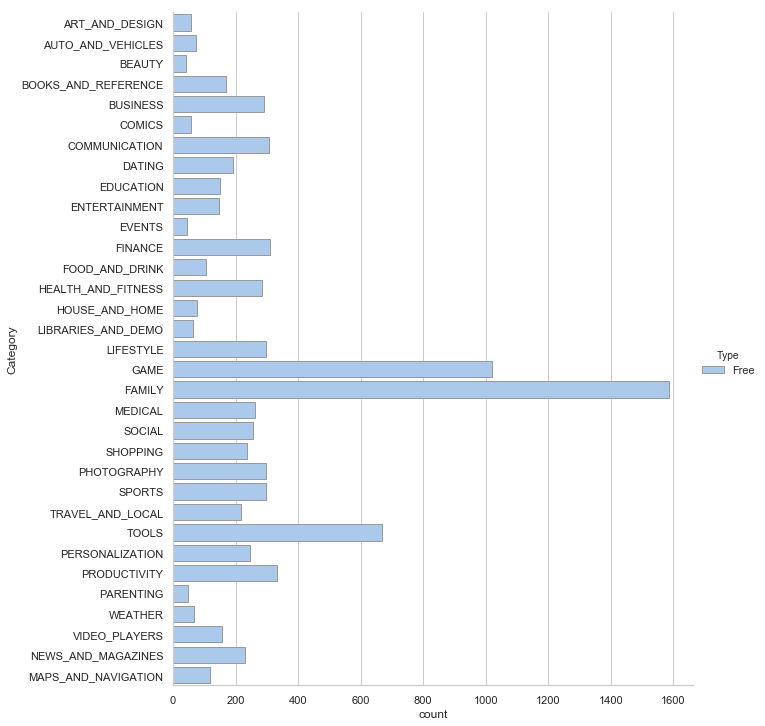

In [21]:
plt.figure(figsize=(5,30))
fig =sns.catplot(y="Category", hue="Type", kind="count",
            palette="pastel", edgecolor=".6", orient="h", height=10,
            data=google_data)
plt.show(fig)

In [22]:
g=google_data.Category.value_counts().reset_index().rename(columns={'index': 'Category', 0: 'count'})
g.loc[[8,20],['Category']]

,Category,Category
8,LIFESTYLE,296
20,EDUCATION,151


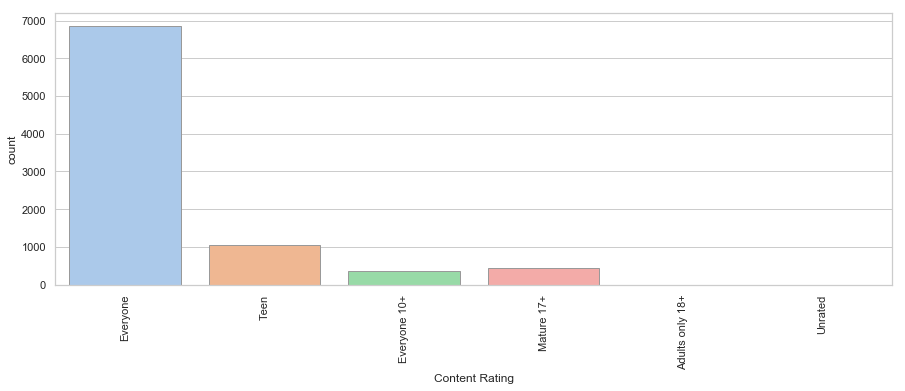

In [23]:
plt.figure(figsize=(15,5))
fig = sns.countplot(x=google_data['Content Rating'], palette="pastel",edgecolor=".6")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

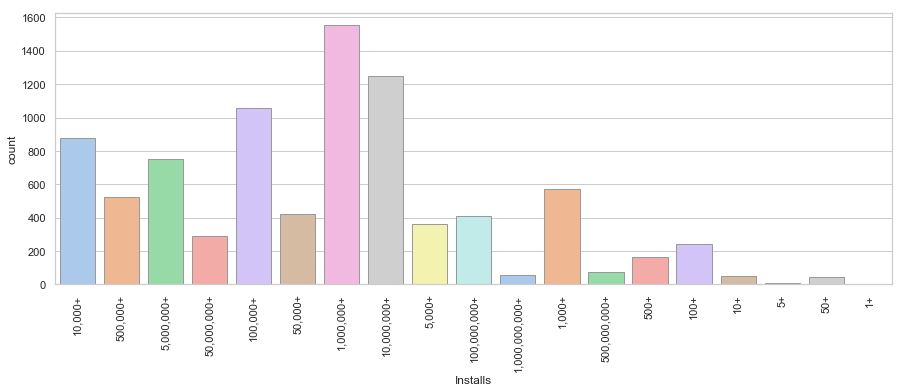

In [24]:
plt.figure(figsize=(15,5))
fig = sns.countplot(x=google_data['Installs'], palette="pastel",edgecolor=".6")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)